Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Environnement préparé.
Found 2578 files belonging to 11 classes.
Found 738 files belonging to 11 classes.
Found 368 files belonging to 11 classes.
📚 Classes : ['Deglet Nour dryer', 'Deglet Nour oily', 'Deglet Nour oily treated', 'Deglet Nour semi-dryer', 'Deglet Nour semi-dryer treated', 'Deglet Nour semi-oily', 'Deglet Nour semi-oily treated', 'alig', 'bessra', 'kenta', 'kintichi']
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 10, 10, 1536)   │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11)             │        16,907 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,800,442 (41.20 MB)

 Trainable params: 16,907 (66.04 KB)

 Non-trainable params: 10,783,535 (41.14 MB)

🎚️ Class Weights : {0: np.float64(1.0145611963793781), 1: np.float64(1.0416161616161617), 2: np.float64(0.9083861874559549), 3: np.float64(1.0324389267120544), 4: np.float64(1.0652892561983471), 5: np.float64(1.0234219928543073), 6: np.float64(0.868013468013468), 7: np.float64(0.7189068600111544), 8: np.float64(1.4739851343624928), 9: np.float64(1.0462662337662338), 10: np.float64(1.121357111787734)}
Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.1003 - loss: 2.4756 - val_accuracy: 0.2954 - val_loss: 2.2264
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 347ms/step - accuracy: 0.2257 - loss: 2.2658 - val_accuracy: 0.4092 - val_loss: 2.0253
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 397ms/step - accuracy: 0.3277 - loss: 2.0738 - val_accuracy: 0.4878 - val_loss: 1.8626
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 345ms/step - accuracy: 0.3951 - loss: 1.9188 - val_accuracy: 0.5379 - val_loss: 1.7279
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 347ms/step - accuracy: 0.4526 - loss: 1.7950 

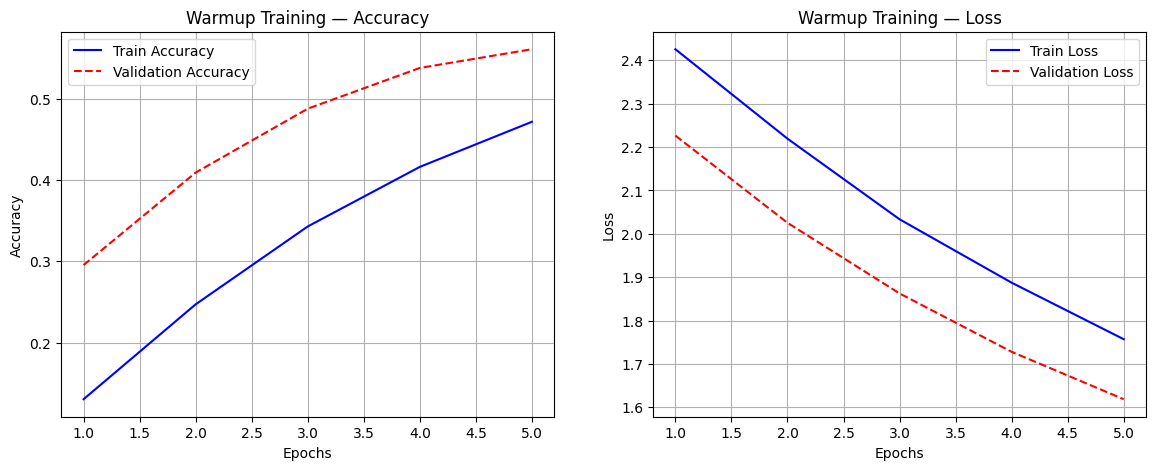

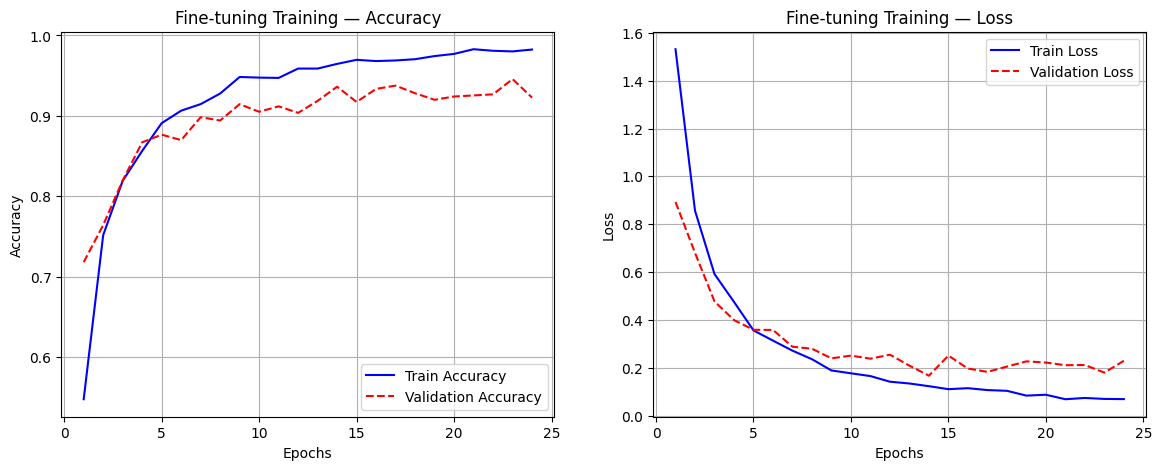

In [3]:
# ============================================================
# 📦 Cellule 0 — Montage de Google Drive + Installation
# ============================================================

from google.colab import drive
drive.mount('/content/drive')

!pip install -q tensorflow==2.19.0 matplotlib seaborn scikit-learn opencv-python

print("✅ Environnement préparé.")


# ============================================================
# 📁 Cellule 1 — Chargement du Dataset
# ============================================================

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

BASE = "/content/drive/MyDrive/MP_IOT_Hend_Hamdi_M2_MP2L/SmartDate/Date_Dataset"
IMG_SIZE = (300, 300)
BATCH_SIZE = 32

train_ds = image_dataset_from_directory(BASE+"/Train",
                                        image_size=IMG_SIZE,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True)

val_ds = image_dataset_from_directory(BASE+"/Validation",
                                      image_size=IMG_SIZE,
                                      batch_size=BATCH_SIZE,
                                      shuffle=False)

test_ds = image_dataset_from_directory(BASE+"/Test",
                                      image_size=IMG_SIZE,
                                      batch_size=BATCH_SIZE,
                                      shuffle=False)

class_names = train_ds.class_names
print("📚 Classes :", class_names)

# Function to one-hot encode labels - REMOVED (will use integer labels with SparseCategoricalCrossentropy)
# def one_hot_encode_labels(image, label):
#     return image, tf.one_hot(label, len(class_names))

# Apply one-hot encoding to the datasets - REMOVED
# train_ds = train_ds.map(one_hot_encode_labels)
# val_ds = val_ds.map(one_hot_encode_labels)
# test_ds = test_ds.map(one_hot_encode_labels)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)


# ============================================================
# 🔄 Cellule 2 — Data Augmentation Premium
# ============================================================

from tensorflow.keras import layers

augment = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.15)
])


# Mixup + Cutmix (Premium)
# import tensorflow_addons as tfa # Commented out due to incompatibility with available TensorFlow versions

# mixup_cutmix = tfa.image.mixup.mixup_and_cutmix( # Commented out due to incompatibility
#     alpha=0.2,  # faible → évite de détruire les détails
# )


# ============================================================
# 🧠 Cellule 3 — EfficientNetB3 (beaucoup + performant)
# ============================================================

from tensorflow import keras
from keras import regularizers

base_model = keras.applications.EfficientNetB3(
    include_top=False,
    input_shape=IMG_SIZE + (3,),
    weights="imagenet"
)

base_model.trainable = False  # warmup 1

inputs = keras.Input(shape=IMG_SIZE + (3,))

x = augment(inputs)
x = keras.applications.efficientnet.preprocess_input(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.35)(x)

outputs = layers.Dense(
    len(class_names),
    activation="softmax",
    kernel_regularizer=regularizers.l2(0.0002)
)(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.AdamW(1e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(), # Removed label_smoothing
    metrics=["accuracy"]
)

model.summary()


# ============================================================
# 🧮 Cellule 4 — Class Weights
# ============================================================

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = []
for imgs, labs in train_ds:
    labels.extend(labs.numpy()) # labs are now integer labels directly

labels = np.array(labels)

class_weights = compute_class_weight(
    "balanced",
    classes=np.unique(labels),
    y=labels
)

class_weights = dict(enumerate(class_weights))
print("🎚️ Class Weights :", class_weights)


# ============================================================
# 🏁 Cellule 5 — Warmup Training (stabilisation)
# ============================================================

history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    class_weight=class_weights
)


# ============================================================
# 🔥 Cellule 6 — Unfreeze progressif + Cosine Decay
# ============================================================

base_model.trainable = True

for layer in base_model.layers[:-40]:
    layer.trainable = False

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-4,
    decay_steps=15000
)

model.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), # Removed label_smoothing
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(
        BASE + "/efficientnet_b3_best.keras",
        save_best_only=True
    )
]

history2 = model.fit(
    # train_ds.map(mixup_cutmix), # This line will cause an error now, user needs to replace mixup_cutmix
    train_ds, # Using original train_ds as mixup_cutmix is commented out
    validation_data=val_ds,
    epochs=40,
    class_weight=class_weights,
    callbacks=callbacks
)


# ============================================================
# 📊 Cellule 7 — Évaluation finale
# ============================================================

print("📈 Évaluation finale en cours...")

val_images = []
val_labels = []

for imgs, labs in val_ds:
    val_images.append(imgs)
    val_labels.append(labs)

val_images = tf.concat(val_images, axis=0)
val_labels = tf.concat(val_labels, axis=0)

preds = model.predict(val_images, batch_size=32)
pred_labels = tf.argmax(preds, axis=1)
true_labels = val_labels # Labels are now integer for SparseCategoricalCrossentropy

from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_labels, target_names=class_names))

print("✅ Modèle EfficientNetB3 Premium entraâné avec succès !")
# ============================================================
# 💾 Cellule 8 — Sauvegarde du modèle dans plusieurs formats
# ============================================================

# Sauvegarde au format natif Keras (recommandé)
model.save("/content/drive/MyDrive/MP_IOT_Hend_Hamdi_M2_MP2L/SmartDate/smartdate_efficientnetb3.keras")
print("✅ Modèle sauvegardé en .keras, .h5 et .tf")
# ============================================================
# 📈 Cellule 9 — Courbes d'apprentissage (train vs val)
# ============================================================

import matplotlib.pyplot as plt

def plot_training_curves(history, title="Training Curves"):
    """
    Affiche les courbes d'accuracy et de loss pour détecter surapprentissage / sous-apprentissage.
    """
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, "b-", label="Train Accuracy")
    plt.plot(epochs, val_acc, "r--", label="Validation Accuracy")
    plt.title(f"{title} — Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, "b-", label="Train Loss")
    plt.plot(epochs, val_loss, "r--", label="Validation Loss")
    plt.title(f"{title} — Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.show()

# Affichage des courbes pour Warmup
plot_training_curves(history1, title="Warmup Training")

# Affichage des courbes pour Fine-tuning
plot_training_curves(history2, title="Fine-tuning Training")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
